# 2. logistic_regression（逻辑回归）

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report

In [189]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 2.1 Visualizing the data

In [190]:
df = pd.read_csv('ex2data1.txt', names = ['Exam1score', 'Exam2score', 'Admitted'])
df.head()
df.shape

,Exam1score,Exam2score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


(100, 3)

Text(0.5, 0, 'Exam 1 score')

Text(0, 0.5, 'Exam 2 score')

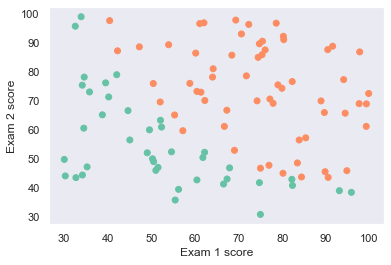

In [191]:
color_labels = df['Admitted'].unique()
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(color_labels, rgb_values))
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.grid()
plt.scatter(df['Exam1score'], df['Exam2score'], c=df['Admitted'].map(color_map))

plt.show()

### 2.2 sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

In [192]:
# insert a column
# in column one, named 'one', value '1'
df.insert(0, 'one', 1)

In [193]:
# different between array and matrix 
# vector and matrix and array?  
# inner product and cross product
X = df.iloc[:, :-1].values
y = np.array(df.iloc[:,-1])
theta = np.zeros(3)
# theta = theta.reshape(3,1)

In [194]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100,))

In [195]:
# former X, y, theta settings are same as in assignment1 
# i think insert 1 is necessary
# 1 / np.exp(z) and np.exp(-z) is same

def Sigmoid (z):
    
     return 1 / (1 + np.exp(-z))

'\naxis 指的就是 x 坐标轴，y 坐标轴等，代表的是一根坐标轴。\n而 axes 在英文里是 axis 的复数形式，也就是说，axes 代表的其实是 figure 当中的一套坐标轴。\n\n另外，\n首先 matplotlib 架构上分为三层\n底层：backend layer\n中层：artist layer\n最高层：scripting layer\n\n在任意一层操作都能够实现画图的目的，而且画出来还都一样。但越底层的操作越细节话，越高层越易于人机交互。\n.plt 对应的就是最高层 scripting layer。这就是为什么它简单上手，但要调细节就不灵了。\nax.plot 是在 artist layer 上操作。基本上可以实现任何细节的调试。\nbackend layer, 至今，我还没有见有人在这个layer上操作过\n\n'

Text(0.5, 0, 'z')

Text(0, 0.5, 'g(z)')

Text(0.5, 1.0, 'sigmoid function')

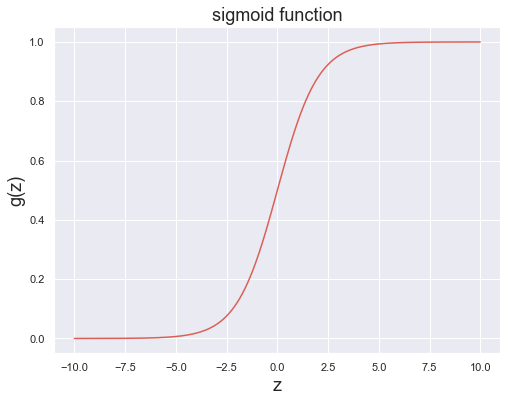

In [196]:
# 如何理解 fig, ax = plt.subplots
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
'''
axis 指的就是 x 坐标轴，y 坐标轴等，代表的是一根坐标轴。
而 axes 在英文里是 axis 的复数形式，也就是说，axes 代表的其实是 figure 当中的一套坐标轴。

另外，
首先 matplotlib 架构上分为三层
底层：backend layer
中层：artist layer
最高层：scripting layer

在任意一层操作都能够实现画图的目的，而且画出来还都一样。但越底层的操作越细节话，越高层越易于人机交互。
.plt 对应的就是最高层 scripting layer。这就是为什么它简单上手，但要调细节就不灵了。
ax.plot 是在 artist layer 上操作。基本上可以实现任何细节的调试。
backend layer, 至今，我还没有见有人在这个layer上操作过

'''
# 我的理解就是 figure是个画板，规定画多大，有多少个子图
# axes 是图里的任何东西，要啥都往里加


fig, ax = plt.subplots(figsize=(8, 6)) # 默认 fig, ax = plt.subplots(11), 就是return一个1行1个的图，图size是8x6的子图
ax.plot(np.arange(-10, 10, step=0.01),
        Sigmoid(np.arange(-10, 10, step=0.01))) # -10,10 还是 -20,20都可以，range的不同导致图形大小不一样而已。 
                                                # step越小，图形越细致。像那个gradient descent 的learning rate一样，太大就跳过最低值了

ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

### 2.3 cost function(代价函数)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function

$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$

In [197]:
def CostFunc(theta, X, y):
    
         
    return np.mean(-y * np.log(Sigmoid(X @ theta)) - (1 - y) * np.log(1 - Sigmoid(X @ theta)))

# def cost(theta, X, y):
#     ''' cost fn is -l(theta) for you to minimize'''
#     return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [198]:
CostFunc(theta, X, y)

0.6931471805599453

### 2.4 Evaluating logistic regression via gradient descent

* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [199]:
# def DerivativeCost(X, y, theta):
    
#     D = X.T @ (Sigmoid (X @ theta) - y)
    
#     return D/(len(X))

In [200]:
def DerivativeCost(theta, X, y):
    return (1 / len(X)) * X.T @ (Sigmoid(X @ theta) - y)

In [201]:
DerivativeCost(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [202]:
'''
def gradientDesc (X, y, theta, epoch, alpha = 0.01):
    _theta = _theta - alpha * DerivativeCost(X1, y1, _theta)

用这个formula算不知道为啥算不了，奇怪。找了很久资料也没说法，以后再看看
'''


'\ndef gradientDesc (X, y, theta, epoch, alpha = 0.01):\n    _theta = _theta - alpha * DerivativeCost(X1, y1, _theta)\n\n用这个formula算不知道为啥算不了，奇怪。找了很久资料也没说法，以后再看看\n'

In [203]:
import scipy.optimize as opt

# why CostFunc should put theta in front of X,y
# cuz opt.minimize rules that the format of callable function in Fun is fun(x, *args) -> float
# which means fun(x, *args) x is the dependent variables, and args are independent variables 

result = opt.minimize(fun=CostFunc, x0=theta, args=(X, y), method='Newton-CG', jac=DerivativeCost)
result

     fun: 0.2034979253085602
     jac: array([1.70019822e-05, 3.11230408e-04, 3.65978254e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 28
    njev: 184
  status: 0
 success: True
       x: array([-25.12257226,   0.20592172,   0.20115791])

In [204]:
# 验证函数
# X: 待验证的特征矩阵
# theta: 已经训练好的逻辑回归参数
def predict(x, theta):
    prob = Sigmoid (x @ theta)
    return (prob >= 0.5).astype(int)

In [205]:
# x is an attribute of the result of opt.minimize(OptimizeResult)
# x is the solution of OptimizeResult
# x is an array
final_theta = result.x

In [206]:
# 计算 y 在训练集上的预测值
y_predict = predict(X, final_theta)

# 打印分类报告
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [207]:
weights = result.x

In [208]:
x = np.arange(130, step=0.1)
y_ = (-weights[0]-weights[1]*x)/weights[2]

C:\Users\jerry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jerry\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.0, 130.0)

(0.0, 130.0)

Text(0.5, 1.0, 'Decision Boundary')

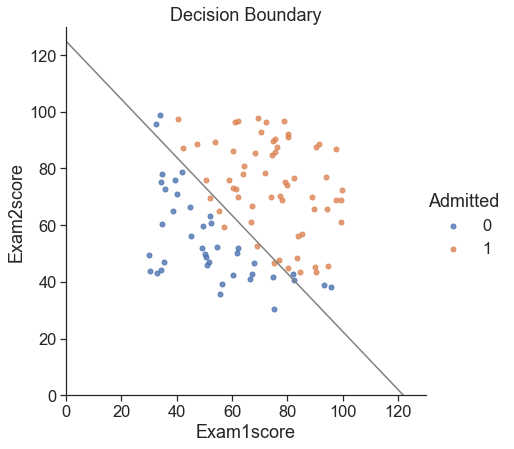

In [209]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('Exam1score', 'Exam2score', hue='Admitted', data=df, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x, y_, 'grey')
plt.xlim(0, 130) # xlimit, 没有这个 regression不能够到xy轴
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

#### Why logistic regression is a linear classifier
http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier
##### Becuase decision boundary is linear

### 2.4 Regularized logistic regression
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [405]:
'''
regularize 是啥, 为啥, 如何
1. dataset may have many features, and overfitting would be occured if the regression captured too many features
2. regularization is a method to correct the problem pf overfitting
3. lambda 变小了就可以penalize theta,让theta 变小，从而减少overfitting
'''
df1 = pd.read_csv('ex2data2.txt', names = ['text1', 'text2', 'admitted1'])
df1.head()
df1.shape

'\nregularize 是啥, 为啥, 如何\n1. dataset may have many features, and overfitting would be occured if the regression captured too many features\n2. regularization is a method to correct the problem pf overfitting\n3. lambda 变小了就可以penalize theta,让theta 变小，从而减少overfitting\n'

,text1,text2,admitted1
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


(118, 3)

C:\Users\jerry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jerry\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


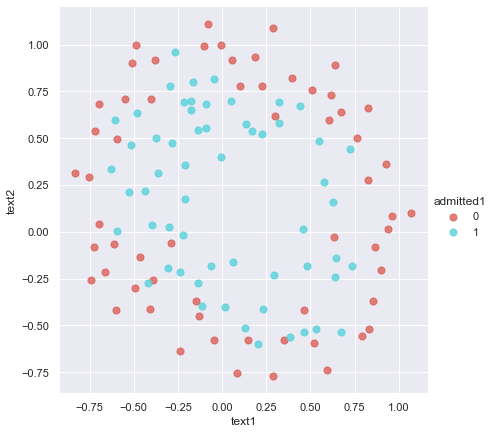

In [406]:
sns.set(context="notebook", style="darkgrid", palette=sns.color_palette('hls',2))
# context 是背景的theme, style是背景格子的theme, palette 就是颜色了

sns.lmplot('text1', 'text2', hue='admitted1', data=df1, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )
plt.show()#看下数据的样子

### 2.5 Feature Mapping（特征映射）

In [407]:
'''
SVM (support vector machine) is a classifier/algorithmn to find out the hiper plane/decision boundary for datasets
Kernal is some method on SVM to deal with datatset
Vecror is a number has direction and length(x,y)
column vecter is a nx1 vector
Scalar is a number

feature mapping a process/way to make data points from low dimentions to higher dimentions(aim at seeking decision boundary for datasets ofc)
'''

'\nSVM (support vector machine) is a classifier/algorithmn to find out the hiper plane/decision boundary for datasets\nKernal is some method on SVM to deal with datatset\nVecror is a number has direction and length(x,y)\ncolumn vecter is a nx1 vector\nScalar is a number\n\nfeature mapping a process/way to make data points from low dimentions to higher dimentions(aim at seeking decision boundary for datasets ofc)\n'

polynomial expansion

```
在这就用了X6次方就可以，但是为啥是6，也许是经验之谈，暂时未知

for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
<img style="float: left;" src="../img/mapped_feature.png">

In [408]:
def feature_mapping(x, y, power, as_ndarray=False):
#     """return mapped features as ndarray or dataframe"""
    # data = {}
    # # inclusive
    # for i in np.arange(power + 1):
    #     for p in np.arange(i + 1):
    #         data["f{}{}".format(i - p, p)] = np.power(x, i - p) * np.power(y, p)

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)


In [409]:
x1 = np.array(df1.text1)
x2 = np.array(df1.text2)
data = feature_mapping(x1, x2, power=6)
print(data.shape)


(118, 28)


In [410]:
# data.shape (118,28)
# data.shape[0] -- 就是118, data total number
# data.shape[1] -- 就是28, the number of each row

theta1 = np.zeros(data.shape[1])

In [411]:
data.insert(0, 'one', 1)
X1 = data.iloc[:, :-1].values
y1 = np.array(df1.iloc[:,-1])

In [412]:
X1.shape, y1.shape

((118, 28), (118,))

In [413]:
def regularized_cost(theta, X, y, l=1):
    theta_ = theta[1:]
    penalized_cost = l/(2*(len(X)))* np.power(theta_, 2).sum()
    return CostFunc(theta, X, y) + penalized_cost

In [414]:
regularized_cost(theta1, X1, y1, l=1)

0.6931471805599454

### 2.6 regularized gradient(正则化梯度)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [415]:
def regularized_gradient(theta, X, y, l=1):
    theta_ = theta[1:]
    penalized_theta = l/len(X)*theta_
    penalized_gradient = np.concatenate([np.array([0]), penalized_theta])
    return DerivativeCost(theta, X, y) + penalized_gradient

In [416]:
regularized_gradient(theta1, X1, y1, l=1)

array([8.47457627e-03, 8.47457627e-03, 1.87880932e-02, 7.77711864e-05,
       5.03446395e-02, 1.15013308e-02, 3.76648474e-02, 1.83559872e-02,
       7.32393391e-03, 8.19244468e-03, 2.34764889e-02, 3.93486234e-02,
       2.23923907e-03, 1.28600503e-02, 3.09593720e-03, 3.93028171e-02,
       1.99707467e-02, 4.32983232e-03, 3.38643902e-03, 5.83822078e-03,
       4.47629067e-03, 3.10079849e-02, 3.10312442e-02, 1.09740238e-03,
       6.31570797e-03, 4.08503006e-04, 7.26504316e-03, 1.37646175e-03])

In [417]:
print('init cost = {}'.format(regularized_cost(theta1, X1, y1)))

res = opt.minimize(fun=regularized_cost, x0=theta1, args=(X1, y1), method='Newton-CG', jac=regularized_gradient)
res

init cost = 0.6931471805599454


     fun: 0.5335419190952739
     jac: array([-1.34237563e-07, -5.73790902e-08, -3.45759092e-08, -2.71213653e-07,
       -1.13458738e-07,  1.97894445e-08, -5.08708422e-08,  1.27981460e-07,
       -1.29654329e-07,  2.76903653e-10, -7.57958824e-08, -1.18314523e-08,
        1.35515147e-07, -2.88454515e-08,  3.34305985e-08,  4.39953603e-08,
        1.61542368e-07, -4.57942012e-08,  6.48235447e-08, -5.15713443e-08,
       -2.82080079e-08,  7.76964162e-08,  1.26524667e-07,  6.80988965e-08,
       -2.07910271e-08,  5.80581809e-08, -3.04488965e-08,  1.08089394e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 71
  status: 0
 success: True
       x: array([ 1.28124652e+00,  4.25953782e-06,  6.23057986e-01,  1.19622285e+00,
       -2.00414578e+00, -9.02305340e-01, -1.57113017e+00,  1.21020691e-01,
       -3.45228825e-01, -3.51504497e-01, -2.98034884e-01, -1.45466498e+00,
       -5.22198056e-02, -6.12214011e-01, -2.50852404e-01, -1.40152717e+00,

In [419]:
final_theta1 = res.x
y_pred1 = predict(X1, final_theta1)

print(classification_report(y1, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        60
           1       0.79      0.91      0.85        58

    accuracy                           0.84       118
   macro avg       0.85      0.84      0.84       118
weighted avg       0.85      0.84      0.84       118

